In [138]:
import numpy as np                 #loading in numpy
from matplotlib import pyplot      #load matplotlib
import math                        # load math in 
#this makes matplotlib plots appear in the notebook (instead of a separate window)
%matplotlib inline 

# Subsonic and Supersonic Isentropic Nozzle Flow Using Goverining Equations in Conservation Form

From the previous notebook, we solved the supersonic and the subsonic nozzle flow problems with a 1-D CFD solver. Here we will revisit the same problem from a different angle. This time, we will make use of the conservation form of the governing equations. This problem illistrtates why it is important to differentiate between governing equations in conservation and nonconservation forms. Both forms of the equations represent the principles of mass conservation, momentum, and energy. Though this may be true, there are numerical reasons why one form is better than another. A good example of that is shock capturing. In the case of shock capturing, the conservation form is well suited to solve the problem, whereas the nonconservation form would produce poor results. 

## Governing Equations

We begin this analysis with the continuity equation we had when we derived the govering equation in the previous example. 

$\frac{\partial (\rho A)}{\partial t} + \frac{\partial (\rho AV)}{\partial x} = 0$

This equation is already in conservation, so we will use it in this form whereas in the last example we showed that with some manipulation we can go back and forth between the conservation and nonconservation forms of the equations. To stay consistent with our approach, we will put this equation in terms of non-dimensional veriables. This process is shown below.

$\frac{\partial \Big(\frac{\rho}{\rho_0}\frac{A}{A^*}\Big)}{\partial \Big(\frac{t}{l/a_0}\Big)} \Big(\frac{\rho_0 A^* a_0}{L}\Big) + \frac{\partial \Big(\frac{\rho}{\rho_0}\frac{A}{A^*}\frac{V}{a_0}\Big)}{\partial (x/L)} \Big(\frac{\rho_0 A^* a_0}{L}\Big)= 0$


In simpler terms, this reduces to:

$\frac{\partial (\rho' A')}{\partial t'} + \frac{\partial (\rho' A'V')}{\partial x'} = 0$


Now on to the momentum equation. 

$\frac{\partial (\rho A V)}{\partial t} + \frac{\partial (\rho AV^2)}{\partial x} = -A \frac{\partial p}{\partial x}$

This equation is already in conservation form, but now we want to rearrage it so that it fits well with the set up of our numerical solution. You will see why we are doing this manipulation soon. 

So lets break up the term on the right side with the following definition:

$\frac{\partial (pA)}{\partial x} = p \frac{\partial A}{\partial x} + A\frac{\partial p}{\partial x}$

We can rearrange this eqation to get $-A\partial p / \partial x$ on one side.

$- A\frac{\partial p}{\partial x} =  p \frac{\partial A}{\partial x} - \frac{\partial (pA)}{\partial x}$

Now if we plug this into the momentum equaiton, we get 

$\frac{\partial (\rho A V)}{\partial t} + \frac{\partial (\rho AV^2)}{\partial x}=  p \frac{\partial A}{\partial x} - \frac{\partial (pA)}{\partial x}$

Combining the x derivatives

$\frac{\partial (\rho A V)}{\partial t} + \frac{\partial (\rho AV^2 + pA)}{\partial x}=  p \frac{\partial A}{\partial x}$


Just like the continuity equaiton we nondimentionalize this equation and get the following equation with some manipulation.

$\frac{\partial (\rho' A' V')}{\partial t'} + \frac{\partial [\rho' A'V'^2 + (1/\gamma )p'A')]}{\partial x'}= \frac{1}{\gamma} p' \frac{\partial A'}{\partial x'}$

Lastly, we have our energy equation in conservation form


$\frac{\partial[\rho(e+V^2/2)A]}{\partial t}+ \frac{\partial[\rho(e+V^2/2)AV+pAV]}{\partial x} = 0$


Nondimentionalizing the equation and using some identities for energy and the ideal gas equation we get the final form of the energy equation for our problem. 

$\frac{\partial \Big[\rho'\Big(\frac{e'}{\gamma -1}+\frac{\gamma}{2}V'^2\Big)A'\Big]}{\partial t'}+ \frac{\partial\Big[\rho'\Big(\frac{e'}{\gamma -a}+\frac{\gamma}{2}V'^2\Big)V'A'+\rho' A' V'\Big]}{\partial x'} = 0$

## Generic Form of the Governing Equations

Now that we have our conservation, momentum, and energy equations, let's utilize the generic form of out govering equations. We do this by establishing a solution vector U, a flux vector F, and the source term J. The elemets of these vectors are as follows.

$U_1 = \rho ' A'$

$U_2 = \rho ' A'V'$

$U_3 = \rho'\Big(\frac{e'}{\gamma -1}+\frac{\gamma}{2}V'^2\Big)A'$

$F_1 = \rho ' A'V'$

$F_2 = \rho ' A'V'^2+\frac{1}{\gamma}p'A'$

$F_3 = \rho'\Big(\frac{e'}{\gamma -1}+\frac{\gamma}{2}V'^2\Big)V'A'+p'A'V'$

$J_1 = 0$

$J_2 = \frac{1}{\gamma}p'\frac{\partial A'}{\partial x'}$

$J_3 = 0$


With these vectors, we can represent our governing equations more simply as

$\frac{\partial U_1}{\partial t'} = -\frac{\partial F_1}{\partial x'}$

$\frac{\partial U_2}{\partial t'} = -\frac{\partial F_2}{\partial x'}+J_2$

$\frac{\partial U_3}{\partial t'} = -\frac{\partial F_3}{\partial x'}$


When we solve our plroblem, we will be calculating it in terms of dependent variables $U$ so the promitive variables such as pressure, temperature, and density will be calculated ouside of the numerical solver. We can extract our primitive variables with these equations

$\rho' = \frac{U_1}{A'}$

$V' = \frac{U_2}{U_1}$

$T' = e' = (\gamma -1)\Big(\frac{U_3}{U_1}-\frac{\gamma}{2}V'^2\Big)$

$p' = \rho 'T'$

For stability reasons, the flux elements must be in terms of the dependent variables. To do this, we use the definitions of $U$, $F$ and $J$ to get things in terms of $U$.


$F_1=U_2$

$F_2 = \frac{U_2^2}{U_1}+ \frac{\gamma -1}{\gamma}\Big(U_3 - \frac{\gamma}{2}\frac{U_2^2}{U_1}\Big)$

$F_3 = \gamma \frac{U_2 U_3}{U_1} - \frac{\gamma (\gamma -1)}{2} \frac{U_2^3}{U_1^2}$

$J_2 = \frac{\gamma -1}{\gamma}\Big(U_3-\frac{\gamma}{2}\frac{U^2_2}{U_1}\Big)\frac{\partial (ln A')}{\partial x'}$


To save us some lines of code later, we can put these values into functions

In [139]:
# Get U vector as a result of primitives
def primToU(rho,temp,vel,area,gamma):
    u1 = rho*area
    u2 = rho*area*vel
    u3 = rho*((temp/(gamma-1)) + ((gamma/2)*(vel**2)))*area
    return u1,u2,u3

def getF(u1,u2,u3,gamma):
    f1 = u2
    f2 = ((u2**2)/u1) + ((gamma-1)/gamma) * (u3 - ( (gamma/2) * ( (u2**2)/u1) ) )
    f3 = gamma * ((u2*u3)/u1) - ( (gamma*(gamma-1)/2) * ((u2**3)/(u1**2)) )
    return f1,f2,f3

# Get primatives from U values
def uToPrimatives(u1,u2,u3,area,gamma):
    rho = u1/area
    vel = u2/u1
    temp = (gamma-1) * ( (u3/u1) - ((gamma/2) * (vel**2)) )
    pres = rho*temp
    return rho,temp,vel,pres

## Boundary Conditions
The physical boundary conditions are the same as the previous problem, but because we are solving the equations in terms of $U$ we will have to change how we set these boundaries. For the subsonic inlet, we hold two values to a constant value and let one of the variables float. In this case, $T'$ and $\rho'$ will be held constant and $V'$ will be allowed to float. By holding $\rho'$ constant, then $U_1$ is held constant as seen below.

$U_{1(i=1)} = (\rho'A')_{i=1} = A'_{i=1} = $ $fixed$ $value$

This value is set to $A'$ because in our case, the value of $\rho'$ and $T'$ are both set to $1$. The value of $V'$ is floating so we can calculate the value for $U_2$ as


$U_{2(i=1)} = 2U_{2(i=2)}-U_{2(i=3)}$

Lastly, we have to calculate $U_3$ from out boundary conditions and calculated floating variable. 


$U_3 = U_1 \Big(\frac{T'}{\gamma-1}+\frac{\gamma}{2}V'^2\Big)$

For this value of $U_3$ we input the floated value for $V'$ we calculated from our new $U_2$ and the value for $T'$ that we set before. 


The boundary conditions for the outlet of the nozzle for supersonic flow are listed below

$(U_1)_N = 2(U_1)_{N-1} - (U_1)_{N-2}$

$(U_2)_N = 2(U_2)_{N-1} - (U_2)_{N-2}$

$(U_3)_N = 2(U_2)_{N-1} - (U_3 )_{N-2}$

The values of $U$ are set by the primative variables and once calculated, they can be used to solve for $F_1$, $F_2$ and $F_3$ at the boundaries. 

## Initial Conditions

We can now begin initializing our problem. The nozzle shape will be the same as the one used for the previous supersonic simulation. 

$A = 1+2.2(x-1.5)^2$


(-1.5, 1.5)

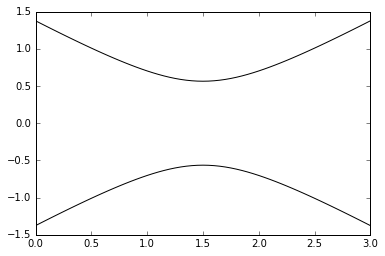

In [140]:
numPts = 61
x=np.linspace(0,3,numPts)
area=1+2.2*(x-1.5)**2
y=(area/3.1415)**0.5
pyplot.plot(x,y,'black')
pyplot.plot(x,-y,'black')
pyplot.xlim([0,3])
pyplot.ylim([-1.5,1.5])

The initial conditions will be set as follows

for $0\leq x' \leq 0.5$:

$\rho' =1.0$

$T' =1.0$

for $0.5\leq x' \leq 1.5$:

$\rho' =1.0 - 0.366(x'-0.5)$

$T' =1.0 - 0.167(x'-0.5)$

for $1.5\leq x' \leq 3.5$:

$\rho' =0.634-0.3879(x'-1.5)$

$T' =0.833-0.3507(x'-1.5)$

In [141]:
rho = np.zeros(numPts)
temp = np.zeros(numPts)
for i in range(numPts):
    if x[i]<0.5:
        rho[i] = 1
        temp[i] =1
    elif x[i]<1.5:
        rho[i] = 1.0 - 0.366*(x[i]-0.5)
        temp[i] = 1.0 - 0.167*(x[i]-0.5)
    else:
        rho[i] = 0.634-0.3879*(x[i]-1.5)
        temp[i] = 0.833-0.3507*(x[i]-1.5)

As for the velocity, we will assume that the initial condition state has a constant mass flow rate. The variable $U_2$ is physically the mass flow rate and is calculated as such $U_2 = \rho' A'V'$. With this equation and a guess that the mass flow rate is 0.59, we can use the following equation to get an initial condition for $V'$.


$V' = \frac{U_2}{\rho' A'} = \frac{0.59}{\rho' A'}$

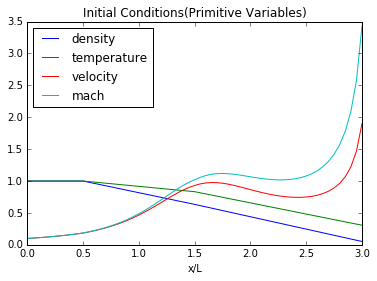

In [142]:
vel = 0.59 / (rho*area)
mach = vel / (temp**0.5)

pyplot.plot(x,rho,label='density')
pyplot.plot(x,temp,label='temperature')
pyplot.plot(x,vel,label='velocity')
pyplot.plot(x,mach,label='mach')
pyplot.legend(loc=2)
pyplot.title('Initial Conditions(Primitive Variables)')
pyplot.xlabel('x/L')

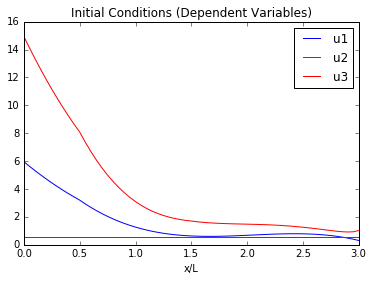

In [143]:
# Lets try out our functions and generate the initial values for U and F
gamma = 1.4
u1,u2,u3 = primToU(rho,temp,vel,area,gamma)
pyplot.plot(x,u1,label='u1')
pyplot.plot(x,u2,label='u2')
pyplot.plot(x,u3,label='u3')
pyplot.legend(loc=1)
pyplot.title('Initial Conditions (Dependent Variables)')
pyplot.xlabel('x/L')

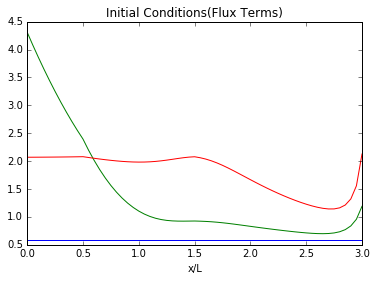

In [144]:
f1,f2,f3 = getF(u1,u2,u3,gamma)
pyplot.plot(x,f1,label='f1')
pyplot.plot(x,f2,label='f2')
pyplot.plot(x,f3,label='f3')
pyplot.title('Initial Conditions(Flux Terms)')
pyplot.xlabel('x/L')

## Time Step
For our time step, we must consider the Courant number

$\Delta t = C\frac{\Delta x}{a+V}$

Where a is the speed of sound locally and V is the local velocity. For every element, there will be a different value for a given Courant number and although we can use a local timestep, we will instead just use the minimum of the whole system at a given timestep.


## Iteration Function
Now we have what we need to construct a function that will iterate one timestep for a given 1D array of points.

In [145]:
def solveFlow(rho,temp,vel,area,gamma,deltat,deltax):
    """
    This code takes in the current state of a 1-D
    nozzle flow problem and iterates one time step 
    forward using the MacCormack method. The boundary
    conditions are for a subsonic inlet and a super-
    sonic outlet. 
    
    Input:  rho,temp,vel,area,gamma,deltat,deltax
    Output: rho,temp,vel,pres,du1dxAv,du2dxAv,du3dxAv
    
    The values du#dxAv are looked at as the residuals
    for each time step. 
    """
    # Convert primitive variablea to U and F vectors for each node
    numPts = len(rho)
    u1,u2,u3 =  primToU(rho,temp,vel,area,gamma)
    f1,f2,f3 = getF(u1,u2,u3,gamma)

    # Initialize array
    du1dt = np.ones(numPts)
    du2dt = np.ones(numPts)
    du3dt = np.ones(numPts)
    u1Bar = np.ones(numPts)
    u2Bar = np.ones(numPts)
    u3Bar = np.ones(numPts)
    f1Bar = np.ones(numPts)
    f2Bar = np.ones(numPts)
    f3Bar = np.ones(numPts)
    rhoBar = np.ones(numPts)
    TBar = np.ones(numPts)
    VBar = np.ones(numPts)
    
    #Predictor Step
    for i in range(0,numPts-1):# starts at node 1 and goes to node N-1
        # Here we implement a difference equation for our general govering equations
        du1dt[i] = -(f1[i+1]-f1[i])/deltax
        j = (1/gamma)*rho[i]*temp[i]*((area[i+1]-area[i])/deltax)
        du2dt[i] = -(f2[i+1]-f2[i])/deltax + j
        du3dt[i] = -(f3[i+1]-f3[i])/deltax
        # Solve for ubar and fbar
        u1Bar[i] = u1[i] + du1dt[i]*deltat 
        u2Bar[i] = u2[i] + du2dt[i]*deltat
        u3Bar[i] = u3[i] + du3dt[i]*deltat
        f1Bar[i],f2Bar[i],f3Bar[i] = getF(u1Bar[i],u2Bar[i],u3Bar[i],gamma)
        # get primatives to recalculate J
        rhoBar[i],TBar[i],VBar[i],dummy2 = uToPrimatives(u1Bar[i],u2Bar[i],u3Bar[i],area[i],gamma)
        
    
    du1dxBar = np.zeros(numPts)
    du2dxBar = np.zeros(numPts)
    du3dxBar = np.zeros(numPts)
    du1dxAv = np.zeros(numPts)
    du2dxAv = np.zeros(numPts)
    du3dxAv = np.zeros(numPts)
    
    # Corrector step
    for i in range(1,numPts-1):# starts at node 2 and goes to node N-1
            du1dxBar[i] = -(f1Bar[i]-f1Bar[i-1])/deltax
            du2dxBar[i] = (-1*((f2Bar[i]-f2Bar[i-1])/deltax)) + ((1/gamma)*rhoBar[i]*TBar[i]*((area[i]-area[i-1])/deltax))
            du3dxBar[i] = -(f3Bar[i]-f3Bar[i-1])/deltax
            # Calculate du/du_av
            du1dxAv[i] = 0.5*(du1dt[i]+du1dxBar[i])
            du2dxAv[i] = 0.5*(du2dt[i]+du2dxBar[i])
            du3dxAv[i] = 0.5*(du3dt[i]+du3dxBar[i])
            u1[i] = u1[i] + du1dxAv[i]*deltat
            u2[i] = u2[i] + du2dxAv[i]*deltat
            u3[i] = u3[i] + du3dxAv[i]*deltat
            
    
    # Get primatives from U values
    rho,temp,vel,pres = uToPrimatives(u1,u2,u3,area,gamma)
    # set BC's
    u1[0] = area[0]
    u2[0] = 2*u2[1] - u2[2]
    u3[0] = u1[0]*((temp[0]/(gamma-1))+(gamma/2)*(vel[0]**2))
    
    u1[numPts-1] = 2*u1[numPts-2] - u1[numPts-3]
    u2[numPts-1] = 2*u2[numPts-2] - u2[numPts-3]
    u3[numPts-1] = 2*u3[numPts-2] - u3[numPts-3]
    
    # final conversion for primatives before output
    rho,temp,vel,pres = uToPrimatives(u1,u2,u3,area,gamma)
    return rho,temp,vel,pres,du1dxAv,du2dxAv,du3dxAv

In [146]:
def main(numPts,numIter):
    # Set up geometry 
    length = 3
    x=np.linspace(0,length,numPts)
    area=1+2.2*(x-1.5)**2
    
    # Flow parameters
    gamma = 1.4
    
    # Establish initial conditions
    rho = np.zeros(numPts)
    temp = np.zeros(numPts)
    for i in range(0,numPts):
        if x[i]<=0.5:
            rho[i] = 1
            temp[i] =1
        elif x[i]<=1.5:
            rho[i] = 1.0 - 0.366*(x[i]-0.5)
            temp[i] = 1.0 - 0.167*(x[i]-0.5)
        else:
            rho[i] = 0.634-0.3879*(x[i]-1.5)
            temp[i] = 0.833-0.3507*(x[i]-1.5)
            
    vel = 0.59 / (rho*area)
    a = temp**0.5 #speed of sound
    
    # Setting up matrix to store data
    rhoResults = np.zeros(shape=(numPts,numIter))
    tempResults = np.zeros(shape=(numPts,numIter))
    velResults = np.zeros(shape=(numPts,numIter))
    presResults = np.zeros(shape=(numPts,numIter))
    u1ResidualResults = np.zeros(shape=(numPts,numIter))
    u2ResidualResults = np.zeros(shape=(numPts,numIter))
    u3ResidualResults = np.zeros(shape=(numPts,numIter))
    
    #Calculate first time step 
    cNum = 0.45 # Courant number
    deltax = length/(numPts-1)
    dtLocal = cNum *(deltax/(a+vel))
    deltat = min(dtLocal)
    
    for i in range(0,numIter):
        rho,temp,vel,pres,du1dxAv,du2dxAv,du3dxAv = solveFlow(rho,temp,vel,area,gamma,deltat,deltax)
        rhoResults[:,i] = rho
        velResults[:,i] = vel
        tempResults[:,i] = temp
        presResults[:,i] = pres
        u1ResidualResults[:,i] = du1dxAv
        u2ResidualResults[:,i] = du2dxAv
        u3ResidualResults[:,i] = du3dxAv
        
        a = temp**0.5 #speed of sound
        dtLocal = cNum *(deltax/(a+vel))
        deltat = min(dtLocal)
        
    print('Done.')
    return rhoResults,tempResults,velResults,presResults,u1ResidualResults,u2ResidualResults,u3ResidualResults, area

In [147]:
rhoResults,tempResults,velResults,presResults,u1ResidualResults,u2ResidualResults,u3ResidualResults,area = main(101,6000)

Done.


Now we can look at our results. First thing is to look at the residuals and make sure we have converged on a solution. 

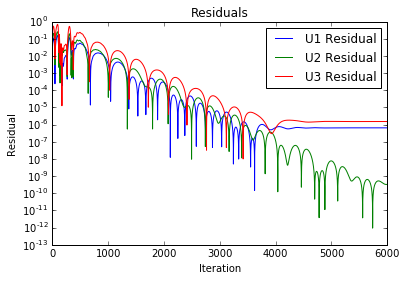

In [148]:
pyplot.plot(abs(u1ResidualResults[int(len(u1ResidualResults)/2),:]),label="U1 Residual")
pyplot.plot(abs(u2ResidualResults[int(len(u1ResidualResults)/2),:]),label="U2 Residual")
pyplot.plot(abs(u3ResidualResults[int(len(u1ResidualResults)/2),:]),label="U3 Residual")
pyplot.yscale('log')
pyplot.xlabel('Iteration')
pyplot.ylabel('Residual')
pyplot.legend()
pyplot.title('Residuals')

From the residual plot, we can see that the steady state solution residual decayed to around 10E-6 for U1 and U3 and less than 10E-9 for U2. For this case, we rean 101 nodes to 6000 iterations. This was done to get a low residual and realistic looking results. This is a good point to experiment with the number of nodes and the number of iterations and watch how the residuals change. Also, take a moment to look back at the nonconservation example and see how that simulation reponds to changes in nodes and iterations. 

As you do this, you will find that the conservation form of the equations require much more computational power in the form of nodes and ireations to get the residuals down. However, you will find that the convergence of the mass flow is much faster with the conservation equations (hence the name convervation vs nonconservation). Below, the local mass flow rate is plotted as the code iterates forward in time. 

What this all boils down to is that the nonconservation equations are better at converging the primative variables and the conservation equation is better at converging to a constant mass flow rate. 

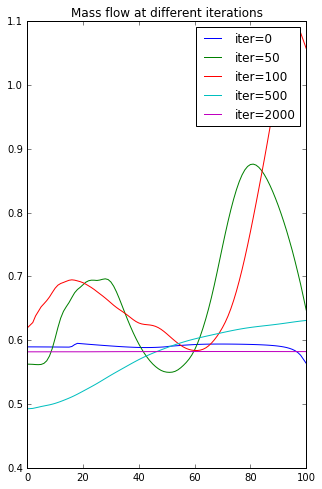

In [149]:
mdot = np.transpose(np.transpose(rhoResults)*np.transpose(velResults)*area)
pyplot.figure(figsize=(5, 8))
pyplot.plot(mdot[:,0],label='iter=0')
pyplot.plot(mdot[:,50],label='iter=50')
pyplot.plot(mdot[:,100],label='iter=100')
pyplot.plot(mdot[:,500],label='iter=500')
pyplot.plot(mdot[:,2000],label='iter=2000')
pyplot.title('Mass flow at different iterations')
pyplot.legend()

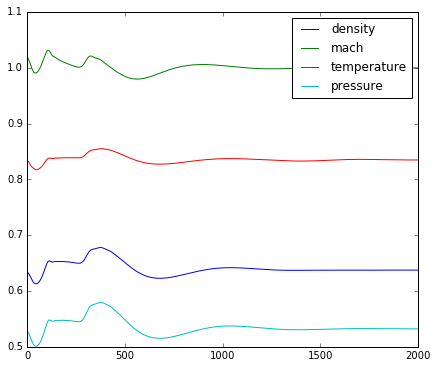

In [150]:
pyplot.figure(figsize=(7, 6))
pyplot.plot(rhoResults[int(len(rhoResults)/2),:],label='density')
pyplot.plot(velResults[int(len(rhoResults)/2),:]/tempResults[int(len(rhoResults)/2),:]**0.5,label='mach')
pyplot.plot(tempResults[int(len(rhoResults)/2),:],label='temperature')
pyplot.plot(presResults[int(len(rhoResults)/2),:],label='pressure')
pyplot.xlim([0,2000])
pyplot.legend()

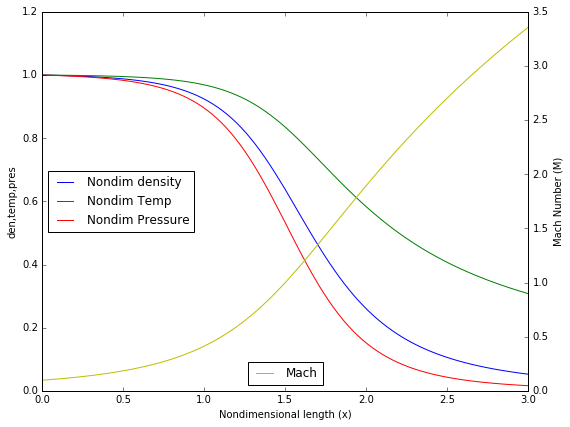

In [163]:
#Lets plots out results 
x = np.linspace(0,3,len(rhoResults[:,-1]))
fig, ax1 = pyplot.subplots(figsize=(8, 6))
ax1.plot(x,rhoResults[:,-1],label='Nondim density')
ax1.plot(x,tempResults[:,-1],label='Nondim Temp')
ax1.plot(x,tempResults[:,-1]*rhoResults[:,-1],label='Nondim Pressure')
ax1.set_xlabel('Nondimensional length (x)')
# Make the y-axis label, ticks and tick labels match the line color.
ax1.set_ylabel('den,temp,pres')
ax1.tick_params('y')
ax1.legend(loc=6)
ax2 = ax1.twinx()
ax2.plot(x,velResults[:,-1]/tempResults[:,-1]**0.5,'y',label='Mach')
ax2.set_ylabel('Mach Number (M)')
ax2.tick_params('y')
ax2.legend(loc = 8)

fig.tight_layout()
pyplot.show()